In [167]:
!pip install bioinfokit

In [1]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import bioinfokit as bio
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

#### collecting data

In [8]:
#load the data set

mcd_data = pd.read_csv("mcdonalds.csv")

#### exploring data

In [9]:
#top 5 rows 

mcd_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [10]:
#  bottom 5 rows 

mcd_data.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [114]:
len(mcd_data)

1453

In [11]:
#the shape of dataset

print(mcd_data.shape)

(1453, 15)


In [12]:
#check details 

mcd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [25]:
# unique value

mcd_data.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [15]:
#insights of the data for numerical column

mcd_data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [18]:
#insights of the data for all dataset

mcd_data.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [19]:
mcd_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [115]:
#all columns name

mcd_data.columns.values

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
       'Age', 'VisitFrequency', 'Gender'], dtype=object)

In [23]:
#count of missing values.
mcd_data.isna().sum()
mcd_data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

#### convert categorical column to numeric

In [33]:
mcd_data['yummy'].value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

In [34]:
mcd_data['convenient'].value_counts()

Yes    1319
No      134
Name: convenient, dtype: int64

In [35]:
mcd_data['fattening'].value_counts()

Yes    1260
No      193
Name: fattening, dtype: int64

In [36]:
mcd_data['greasy'].value_counts()

Yes    765
No     688
Name: greasy, dtype: int64

In [37]:
mcd_data['fast'].value_counts()

Yes    1308
No      145
Name: fast, dtype: int64

In [38]:
mcd_data['cheap'].value_counts()

Yes    870
No     583
Name: cheap, dtype: int64

In [39]:
mcd_data['tasty'].value_counts()

Yes    936
No     517
Name: tasty, dtype: int64

In [40]:
mcd_data['expensive'].value_counts()

No     933
Yes    520
Name: expensive, dtype: int64

In [41]:
mcd_data['healthy'].value_counts()


No     1164
Yes     289
Name: healthy, dtype: int64

In [42]:
mcd_data['disgusting'].value_counts()

No     1100
Yes     353
Name: disgusting, dtype: int64

In [116]:
mcd_data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [44]:
mcd_data["yummy"]= mcd_data["yummy"].replace({'Yes':1, 'No':0})
mcd_data["convenient"] = mcd_data["convenient"].replace({'Yes':1, 'No':0})
mcd_data["spicy"] = mcd_data["spicy"].replace({'Yes':1, 'No':0})
mcd_data["fattening"] = mcd_data["fattening"].replace({'Yes':1, 'No':0})
mcd_data["greasy"] = mcd_data["greasy"].replace({'Yes':1, 'No':0})
mcd_data["fast"] = mcd_data["fast"].replace({'Yes':1, 'No':0})
mcd_data["cheap"] = mcd_data["cheap"].replace({'Yes':1, 'No':0})
mcd_data["tasty"] = mcd_data["tasty"].replace({'Yes':1, 'No':0})
mcd_data["expensive"] = mcd_data["expensive"].replace({'Yes':1, 'No':0})
mcd_data["healthy"] = mcd_data["healthy"].replace({'Yes':1, 'No':0})
mcd_data["disgusting"] = mcd_data["disgusting"].replace({'Yes':1, 'No':0})

mcd_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [118]:
mcd_data1= mcd_data.iloc[:,0:11]
mcd_data1.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


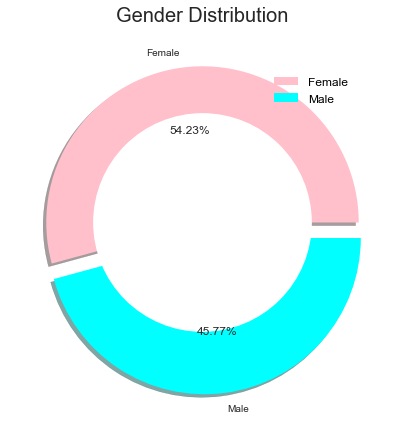

In [117]:
# Customer segmentation - based on socio-demographs (Age & Gender)

# Gender
labels = ['Female', 'Male']
size = mcd_data['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')

# Add a title and adjust the position
plt.title('Gender Distribution', fontsize = 20)
plt.subplots_adjust(top=1.2)

plt.axis('off')

# Add a shadow effect to the chart

plt.gca().set_aspect('equal')
plt.gca().set_facecolor('white')
plt.gca().add_artist(plt.Circle((0,0),0.7,fc='white'))
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.gca().set_axisbelow(True)

# Add a legend with custom labels and adjust the position
legend_labels = ['Female', 'Male']
plt.legend(labels=legend_labels, loc='upper right', bbox_to_anchor=(0.9, 0.9), frameon=False, prop={'size': 12})

# Display the chart
plt.show()

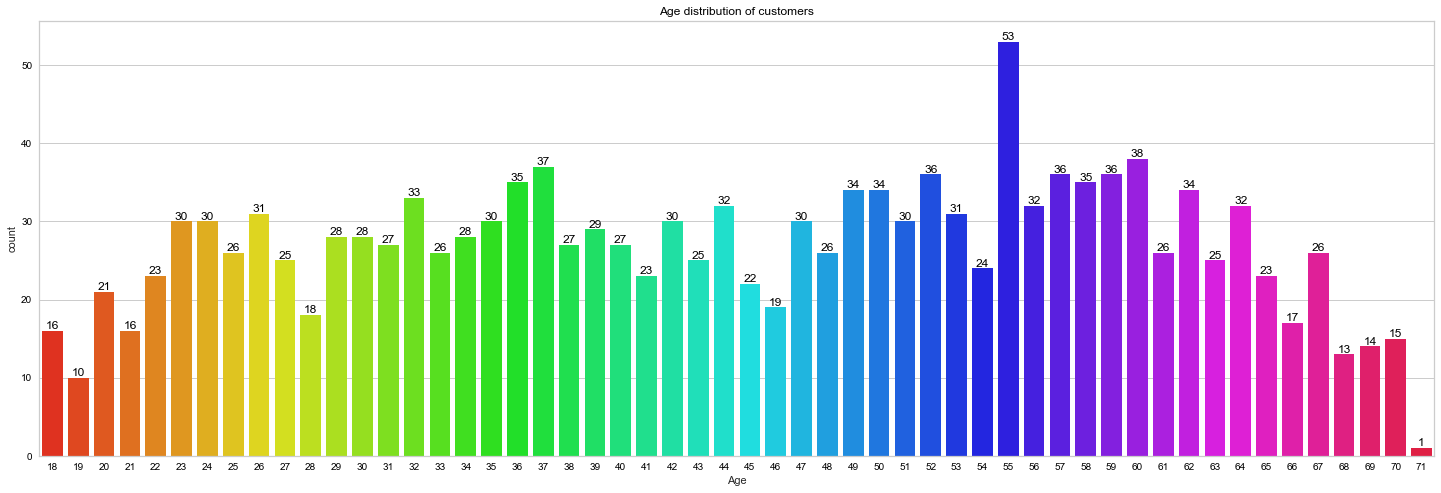

In [127]:
#Age

plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=mcd_data['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40.

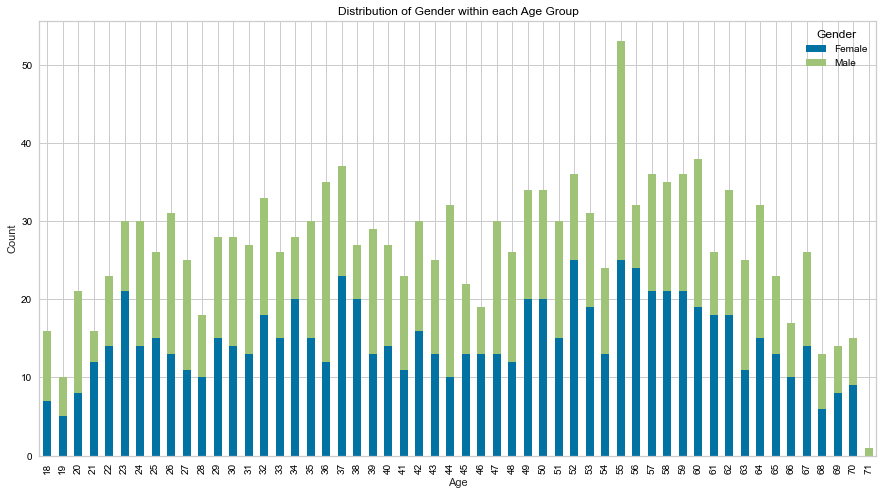

In [128]:
# Group the data by Age and Gender
age_gender = mcd_data.groupby(['Age', 'Gender']).size().reset_index(name='Count')

# Pivot the data to create a matrix of Age vs Gender counts
age_gender_pivot = age_gender.pivot(index='Age', columns='Gender', values='Count').fillna(0)

# Create a stacked bar chart
ax = age_gender_pivot.plot(kind='bar', stacked=True, figsize=(15,8))

# Add axis labels and a title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender within each Age Group')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'], title='Gender')
plt.show()

# Mcdonalds recieve more customers of age between 50-60 and 35-40.

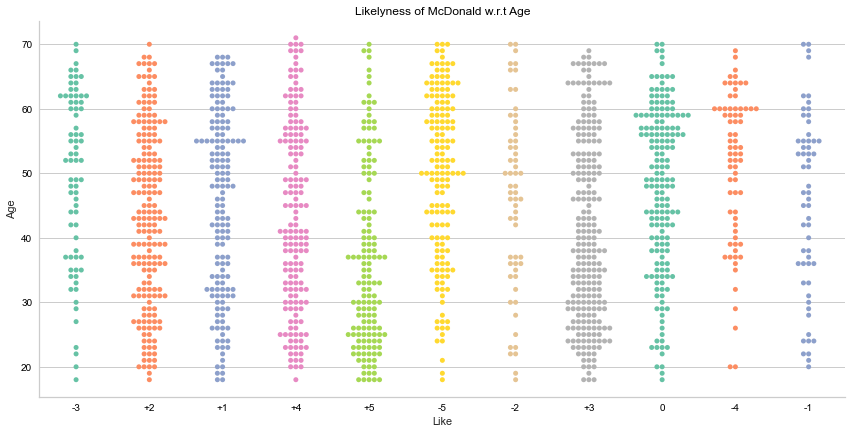

In [129]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
mcd_data['Like']= mcd_data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=mcd_data, 
            orient="v", height=6, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [130]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    mcd_data[x] = LabelEncoder().fit_transform(mcd_data[x])
    return mcd_data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
mcd_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


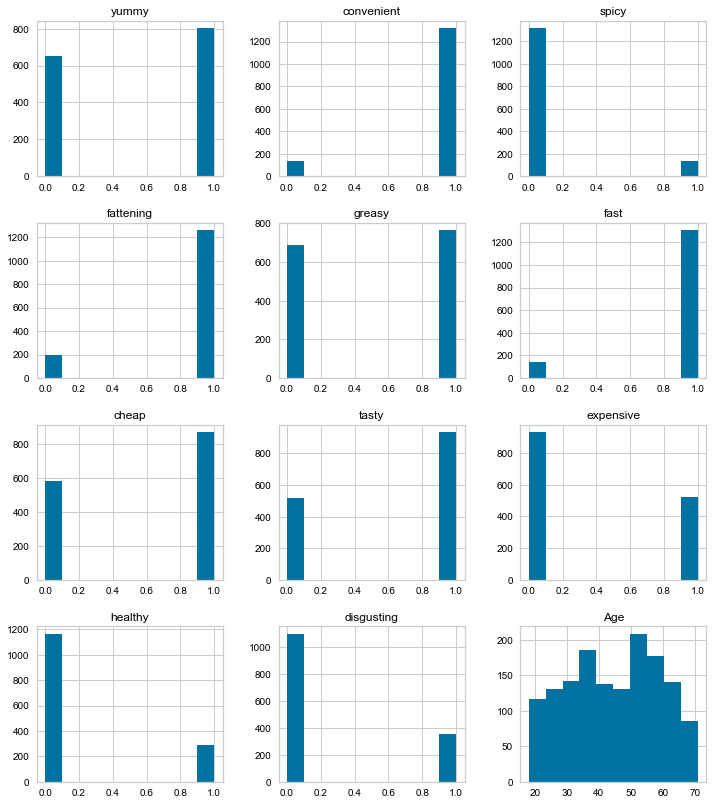

In [124]:
#Histogram of the each attributes

plt.rcParams['figure.figsize'] = (12,14)
mcd_data.hist()
plt.show()

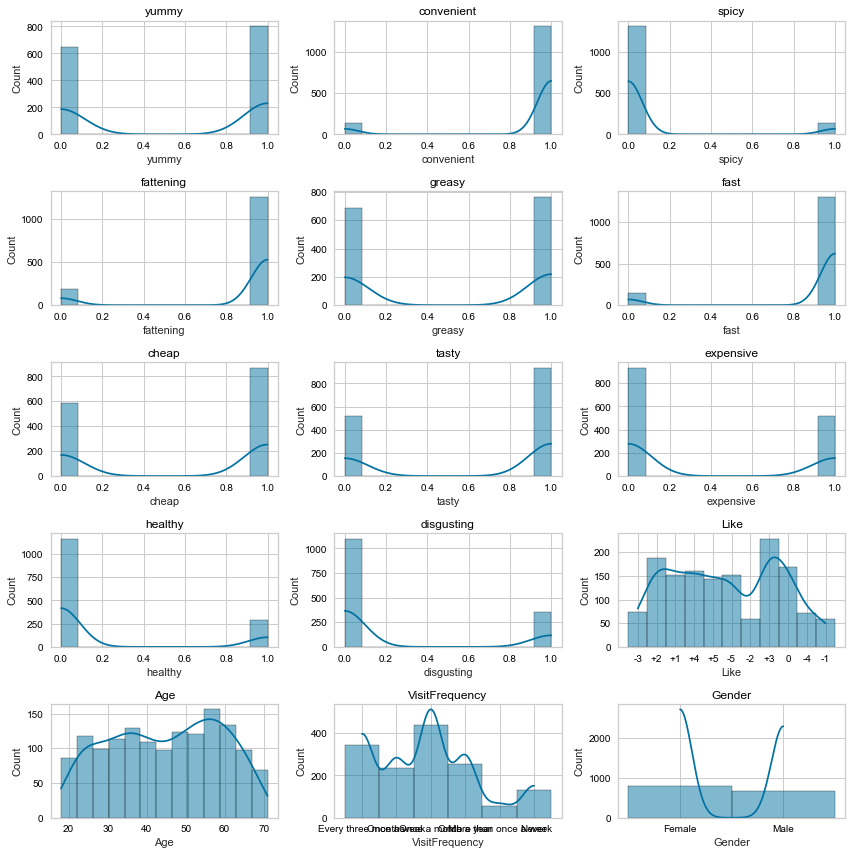

In [131]:
plt.figure(figsize=(12,14))
for i, col in enumerate(mcd_data.columns):
    plt.subplot(6, 3, i+1)
    sns.histplot(mcd_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [132]:
#Considering only first 11 attributes

mcd_eleven = mcd_data.loc[:,cat]
mcd_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [133]:
#Considering only the 11 cols and converting it into array

x = mcd_data.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [134]:
#Principal component analysis

from sklearn import preprocessing
pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [135]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [136]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [137]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = mcd_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


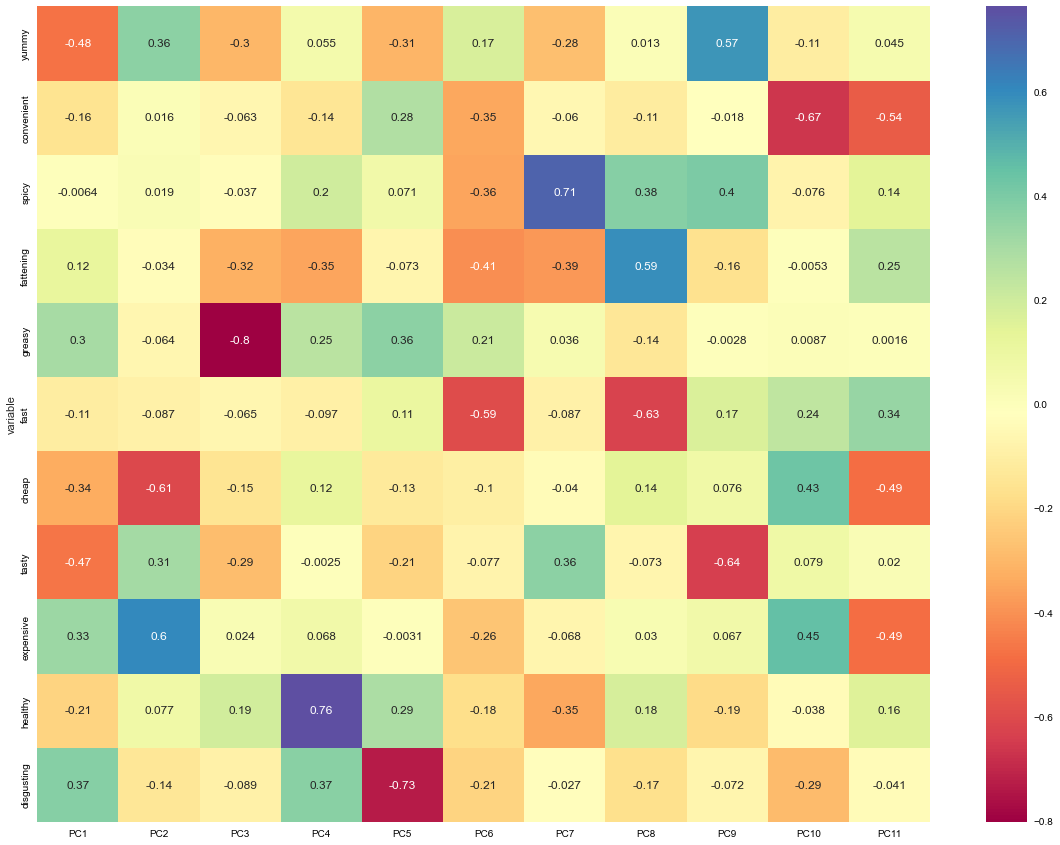

In [138]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

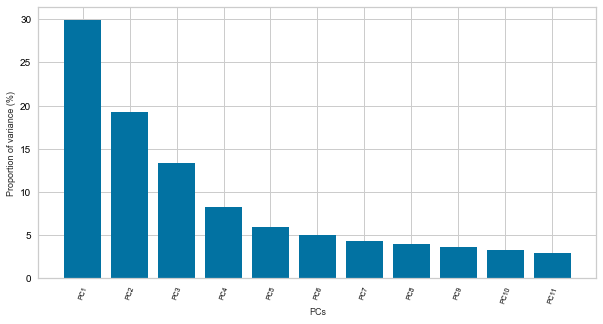

In [139]:
#Scree plot (Elbow test)- PCA

from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

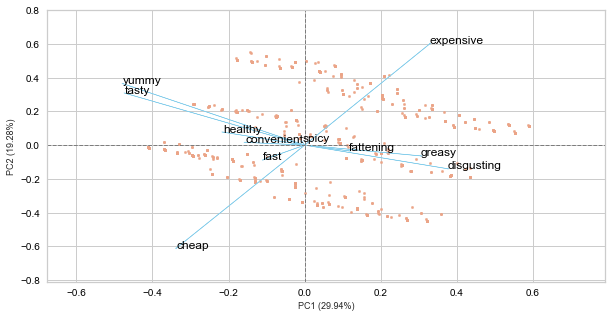

In [140]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=mcd_data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

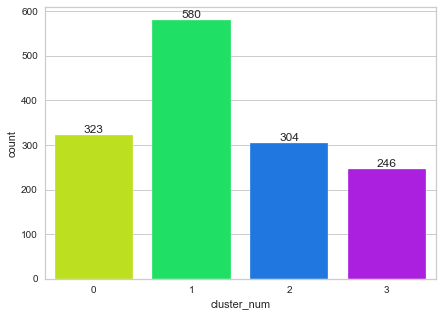

In [173]:
f = sns.countplot(x=mcd_data["cluster_num"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)
# print(len(dataset['cluster_num'][1]))

In [168]:
std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))
    
print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([0.75678896, 0.60724649, 0.50444578, 0.39866134, 0.33728888,
       0.31016782, 0.28959761, 0.27502727, 0.2651598 , 0.24875617,
       0.23682131])

In [169]:
pov = pca.explained_variance_ratio_
print("Proportion of Variance")
pov

Proportion of Variance


array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [170]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

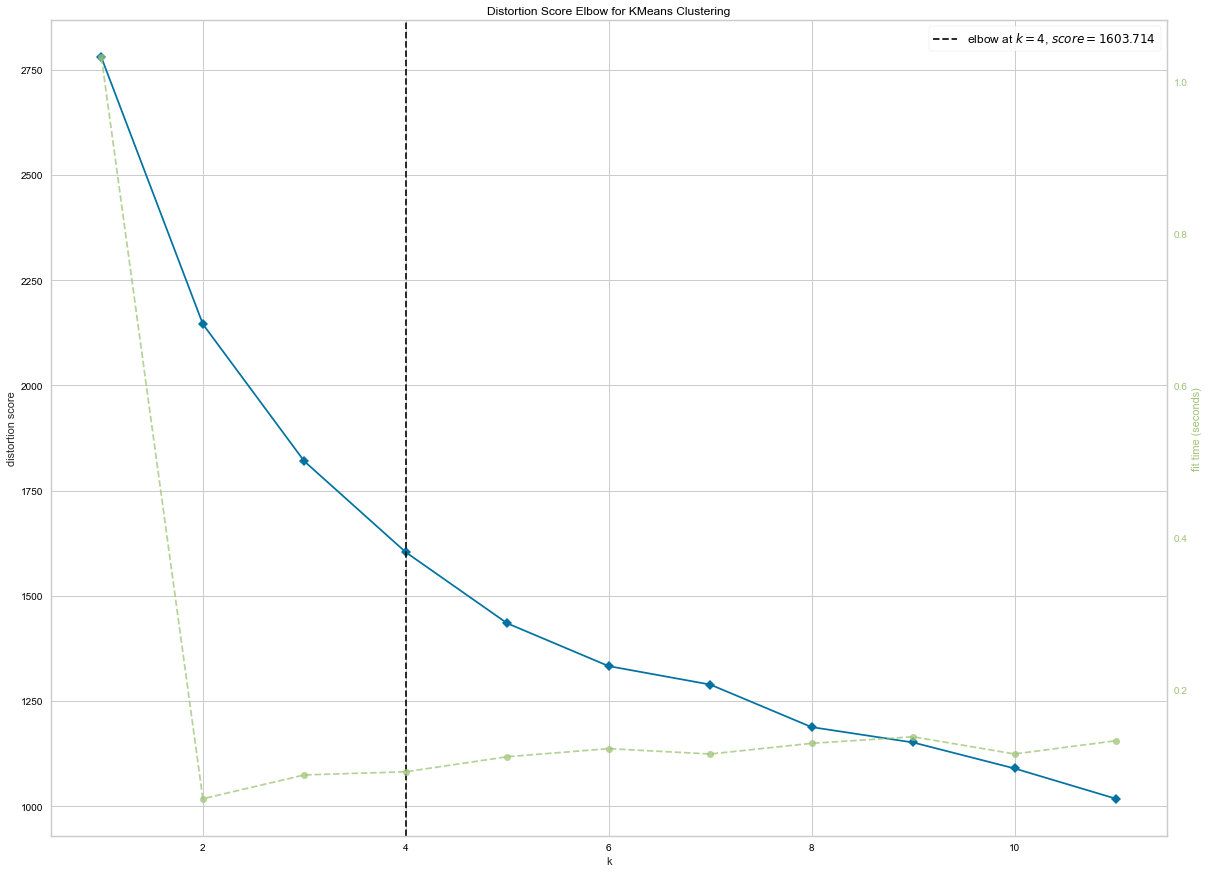

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [141]:
#Using k-means clustering analysis

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(mcd_eleven)
visualizer.show()

In [151]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(mcd_eleven)
mcd_data['cluster_num'] = kmeans.labels_ #adding to mcd
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 0 0 ... 0 1 3]
1603.0604440558945
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [152]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

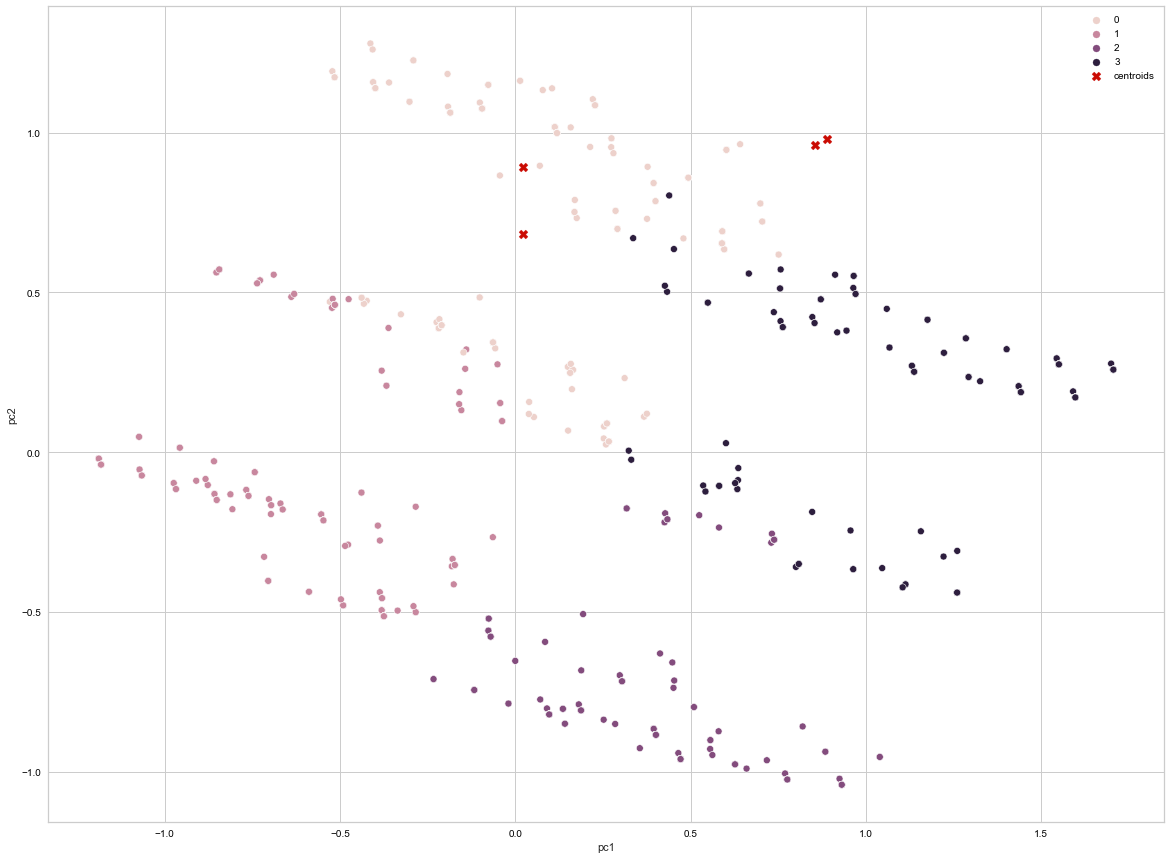

In [153]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [178]:
mcd_data2=pd.get_dummies(mcd_data, prefix=['cluster_num'], columns=['cluster_num'])
mcd_data2.head(4)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,7,61,0,0,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,1,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,0,1,0,0


In [154]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(mcd_data['cluster_num'],mcd_data['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


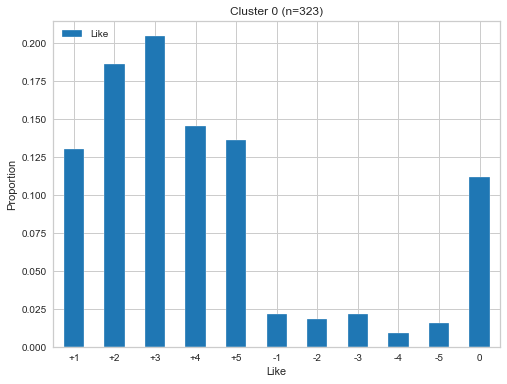

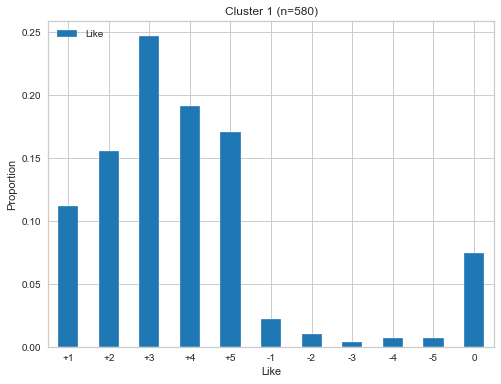

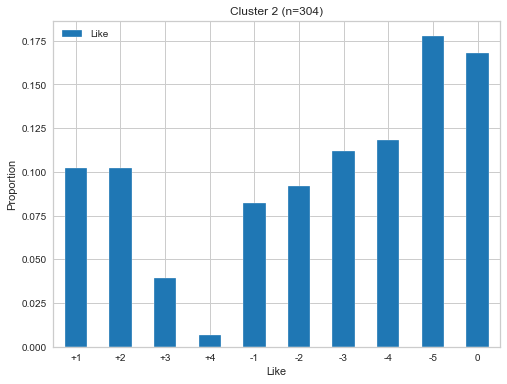

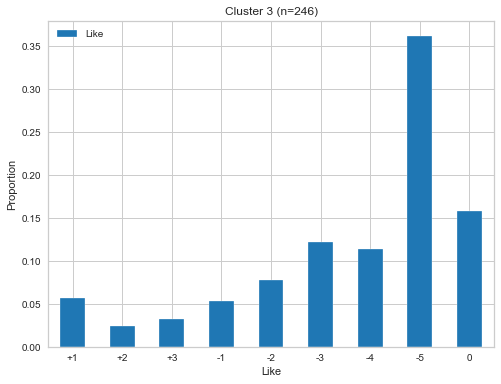

In [155]:
sns.set_style('whitegrid')
sns.set_palette('tab10')

# create stacked bar charts for each cluster
for i in range(mcd['cluster_num'].nunique()):
    cluster = mcd[mcd['cluster_num'] == i]
    like_counts = cluster['Like'].value_counts(normalize=True).sort_index()
    like_counts.plot(kind='bar', stacked=True, figsize=(8,6))
    plt.xticks(rotation=0)
    plt.xlabel('Like')
    plt.ylabel('Proportion')
    plt.title(f'Cluster {i} (n={len(cluster)})')
    plt.legend(loc='upper left')
    plt.show()

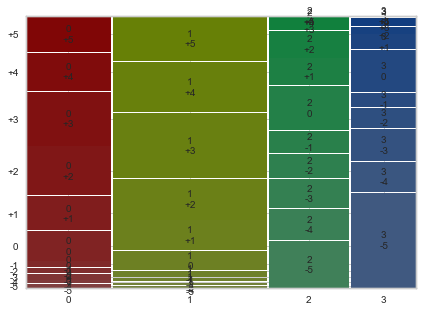

In [156]:
#MOSAIC PLOT

plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [158]:
#Mosaic plot gender vs segment

crosstab_gender =pd.crosstab(mcd_data['cluster_num'],mcd_data['Gender'].replace({1: 'Male', 0: 'Female'}))
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


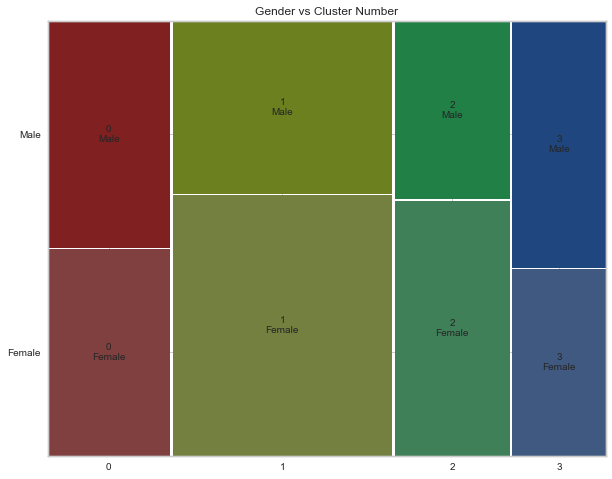

In [159]:
plt.rcParams['figure.figsize'] = (7,5)
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(crosstab_gender.stack(), ax=ax, title='Gender vs Cluster Number')
plt.show()

Text(0.5, 1.0, 'Distribution of Age by Cluster Number')

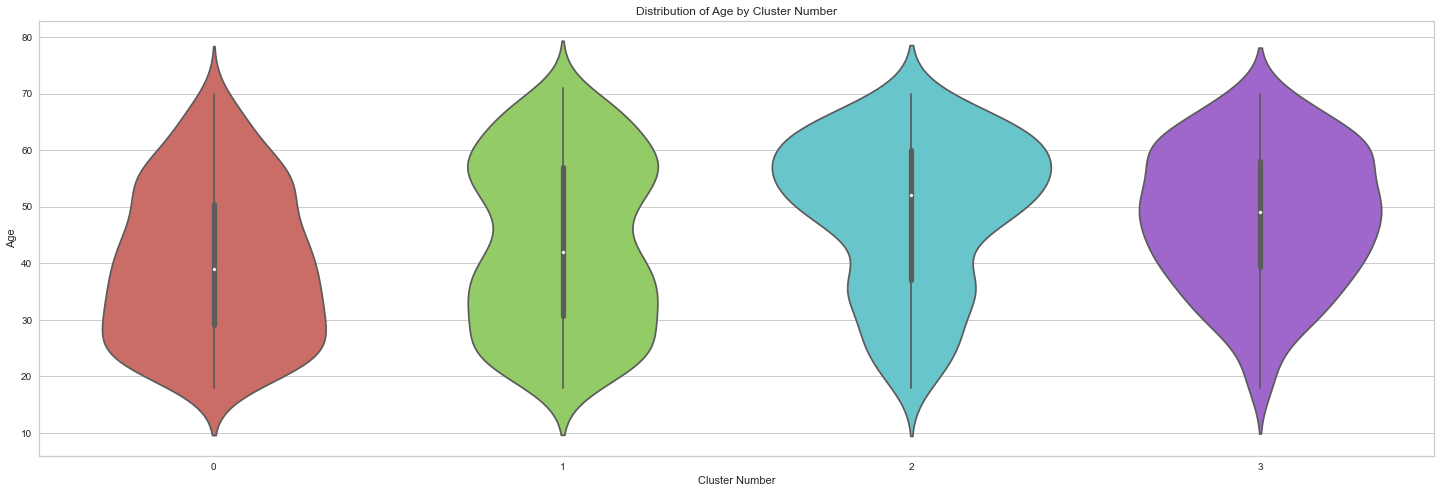

In [192]:
# create a color palette based on the number of clusters
color_palette = sns.color_palette("hls", len(mcd_data['cluster_num'].unique()))

# create a violinplot of age by cluster
sns.violinplot(x="cluster_num", y="Age", data=mcd_data, palette=color_palette)

# add labels and title
plt.xlabel("Cluster Number")
plt.ylabel("Age")
plt.title("Distribution of Age by Cluster Number")

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

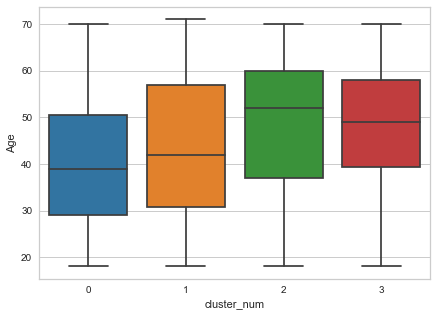

In [160]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=mcd_data)

In [161]:
#Calculating the mean
#Visit frequency

mcd_data['VisitFrequency'] = LabelEncoder().fit_transform(mcd['VisitFrequency'])
visit = mcd_data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [162]:
#Like
mcd_data['Like'] = LabelEncoder().fit_transform(mcd_data['Like'])
Like = mcd_data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [164]:
#Gender
mcd_data['Gender'] = LabelEncoder().fit_transform(mcd_data['Gender'])
Gender = mcd_data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [165]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


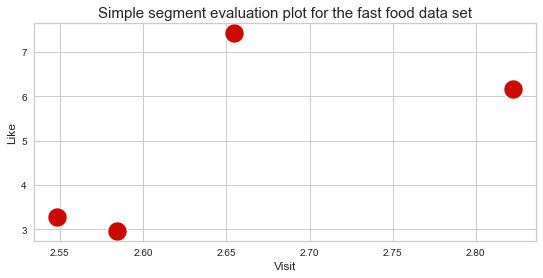

In [166]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

#### Conclusion
This is a scatterplot showing the relationship between the two variables "VisitFrequency" and "Like" for the segment data. Each point in the plot represents a data point in the segment dataset. The x-axis represents the "VisitFrequency" variable, which indicates how often a person visits a fast food restaurant. The y-axis represents the "Like" variable, which indicates how much a person likes fast food.
The plot shows that there are four distinct groups or clusters of data points. The group on the bottom left represents people who visit fast food restaurants less frequently and have a low liking for fast food. The group on the bottom right represents people who visit fast food restaurants more frequently but still have a low liking for fast food. The group on the top left represents people who visit fast food restaurants less frequently but have a high liking for fast food. The group on the top right represents people who visit fast food restaurants more frequently and have a high liking for fast food.
The plot helps to identify the target segments for the fast food industry. The target segments would be the group on the top right, as they visit fast food restaurants frequently and have a high liking for fast food. The industry could focus on targeting this group with their marketing and promotions to increase sales and profitability.

In [49]:
scaled_df = scalar.fit_transform(mcd_data1)

pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

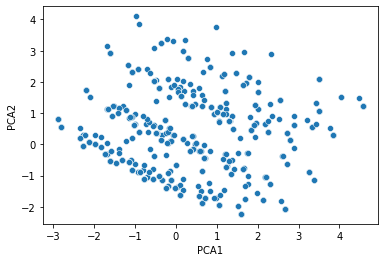

In [50]:
#Visualization of PCA1 and PCA2

sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")

<AxesSubplot:>

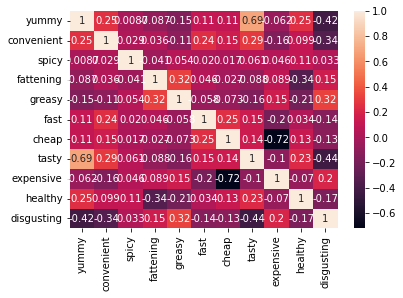

In [52]:
sns.heatmap(mcd_data1.corr(), annot=True)

#### Extracting segments

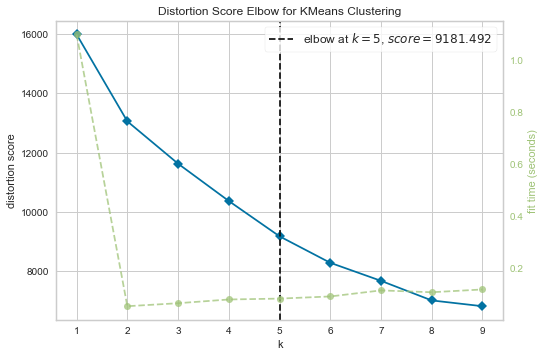

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

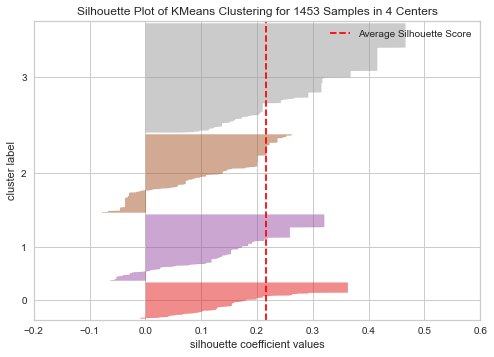

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_df)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [56]:
#assign cluster number with there type in PCA
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170,0
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681,1
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530,1
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201,1
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144,0


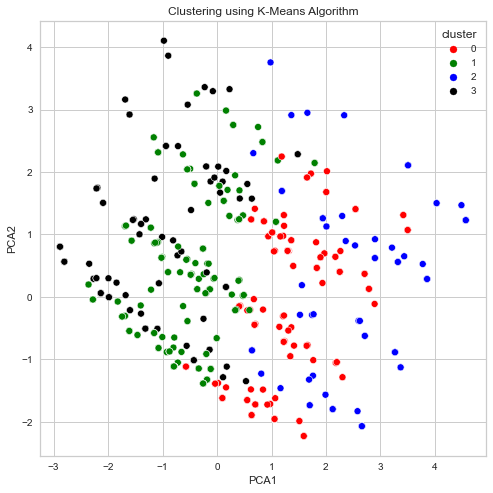

In [57]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [59]:
# Creating a target column "Cluster" for storing the cluster segment
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([mcd_data1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,0


<AxesSubplot:xlabel='cluster', ylabel='count'>

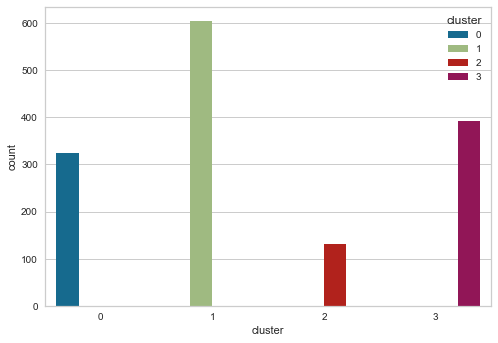

In [60]:
#analysis cluster's

sns.countplot(x ='cluster', data = pca_df_kmeans1,hue = "cluster")

#### Profiling segments

In [61]:
#grouping with cluster 1
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,0
4,0,1,0,1,1,1,1,0,0,1,0,0
10,0,1,0,1,0,1,1,0,0,0,1,0
12,0,1,0,1,0,1,1,0,0,0,0,0
28,0,1,0,0,0,1,0,0,0,0,0,0


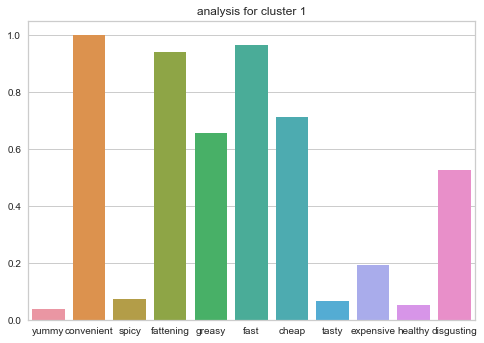

In [62]:
#analysis for cluster 1
ax = sns.barplot(data=cluster_1_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 1')
plt.show()

In [63]:
#grouping with cluster 2

cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
3,1,1,0,1,1,1,1,1,0,0,1,1
5,1,1,0,1,0,1,1,1,0,0,0,1
7,1,1,0,1,1,1,1,1,0,0,0,1
15,1,1,0,1,0,1,1,1,0,0,0,1
16,1,1,0,1,1,1,1,1,0,0,0,1


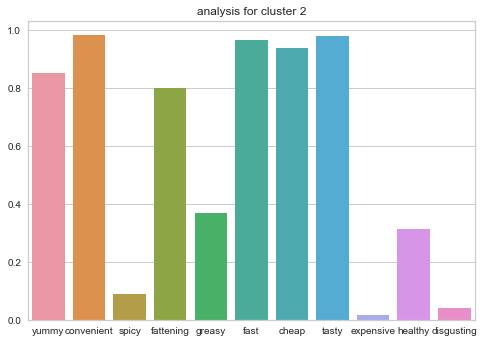

In [64]:
#analysis for cluster 2

ax = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 2')
plt.show()

In [66]:
#grouping with cluster 3

cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster_3_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,2
18,0,0,0,1,1,1,1,0,1,0,1,2
38,0,0,0,1,1,1,1,0,0,0,1,2
39,0,0,0,1,1,1,0,0,1,0,1,2
40,1,0,0,1,0,0,0,1,1,0,0,2


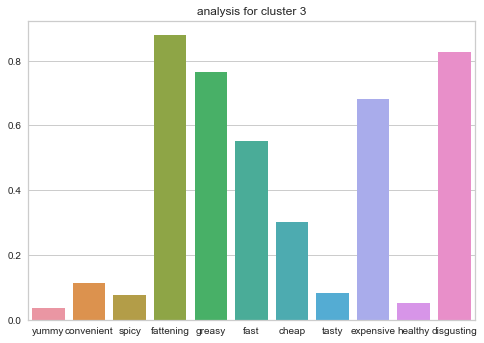

In [67]:
#analysis for cluster 3

ax = sns.barplot(data=cluster_3_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 3')
plt.show()

In [68]:
#grouping with cluster 4

cluster_4_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]
cluster_4_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
6,1,1,1,1,0,1,0,1,1,1,0,3
9,1,1,0,1,1,1,0,1,1,0,0,3
11,1,1,0,1,1,1,0,1,1,0,1,3


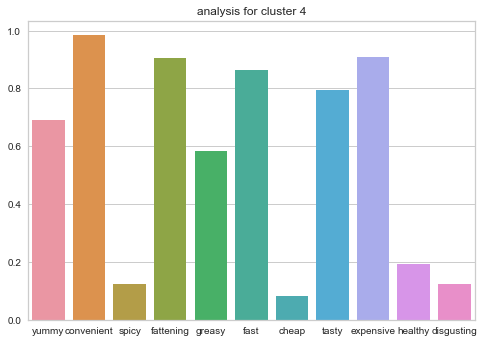

In [75]:
#analysis for cluster 4

ax = sns.barplot(data=cluster_4_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 4')
plt.show()

#### Describining Segments

In [96]:
mcd_data_new= pd.concat([mcd_data,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
mcd_data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0


In [97]:
mcd_data_new['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [98]:
mcd_data_new["VisitFrequency"]= mcd_data_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})
mcd_data_new['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [99]:
mcd_data_new['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [100]:
mcd_data_new["Like"]= mcd_data_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
mcd_data_new["Gender"]= mcd_data_new["Gender"].replace({'Female':0, 'Male':1})
mcd_data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,0
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,3
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,3
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,0


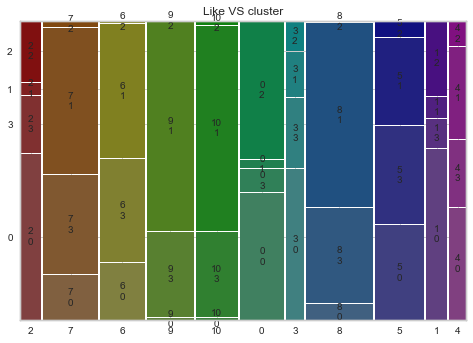

In [101]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(mcd_data_new, ['Like','cluster'],title='Like VS cluster')
plt.show()

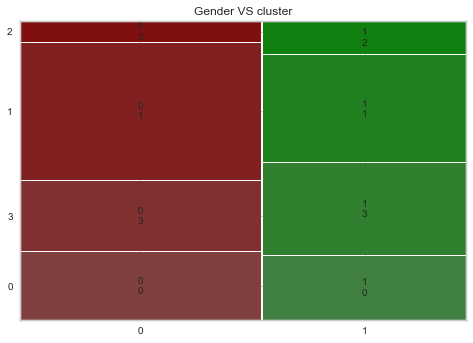

In [102]:
mosaic(mcd_data_new, ['Gender','cluster'],title='Gender VS cluster')
plt.show()

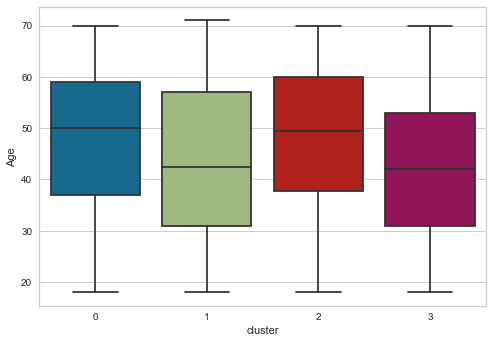

In [103]:
# Visual Python: Visualization > Seaborn

sns.boxplot(x=mcd_data_new['cluster'], y=mcd_data_new['Age'])
plt.show()

#### Selecting Target Segments

In [104]:
#Split Dataset
X = mcd_data_new.drop(['cluster'],axis=1)
y= mcd_data_new[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [105]:
X_test.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
63,0,1,0,1,1,1,0,0,1,0,0,5,54,3,1
1441,1,1,0,1,1,1,0,1,1,0,0,10,29,4,1
1264,1,1,0,1,1,1,1,1,0,0,1,5,40,3,1


In [106]:
y_test.head(3)

,cluster
63,3
1441,3
1264,1


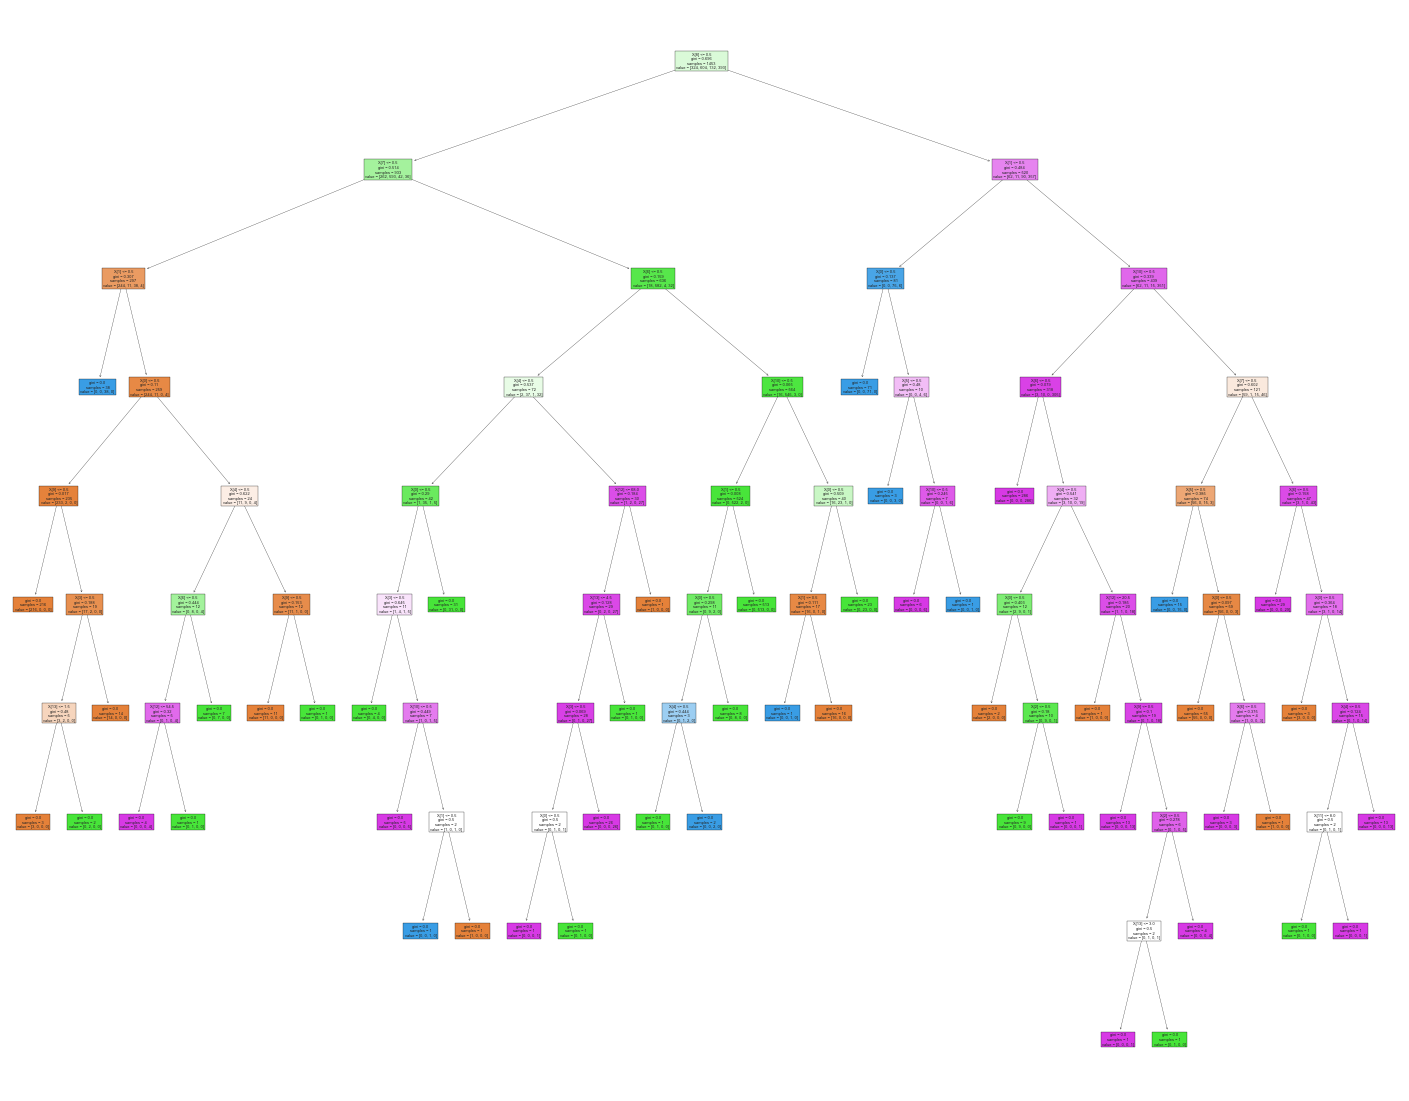

In [107]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   filled=True)

#### Evaluation and monitoring

In [112]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 92   1   0   4]
 [  1 176   0   2]
 [  0   0  38   0]
 [  2   2   4 114]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        97
           1       0.98      0.98      0.98       179
           2       0.90      1.00      0.95        38
           3       0.95      0.93      0.94       122

    accuracy                           0.96       436
   macro avg       0.95      0.97      0.96       436
weighted avg       0.96      0.96      0.96       436



In [113]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
  
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.963302752293578 % Acuuracy
